In [11]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import neurofit as nf
import pyspike as pyspk
from scipy.signal import resample

import sys
import os
sys.path.append("../") # for importing utils and glm

import utils
from neurofit import utils as nfutils

import pandas as pd

# plotting packages
%matplotlib inline
from matplotlib.pyplot import * # plotting functions
import seaborn as sns           # data visualization package
sns.set_style("whitegrid")
sns.set_palette("cubehelix")

In [12]:
#exclude = ["oo0108_4_B","oo1220_1_B","pupu0333_4_B","oo1220_5_A", "pipu1018_11_B", "yy1617_3_B"]
exclude = []

# load mcmc results
folder = "crcns_dstrfree_cm"
root = "/scratch/dstrf/results/"
path = "/".join([root,folder,""])

cm_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: 
            pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                cm_results[name] = np.load(os.path.join(root,filename))

cm_maxlik = np.asarray([cm_results[m]['map'] for m in cm_results.keys()])
cm_chain = np.asarray([cm_results[m]['chain'] for m in cm_results.keys()])

s = cm_chain.shape
cm_chain = cm_chain.reshape(s[0] * s[1], s[2])

In [13]:
cm_maxlik = cm_maxlik[:,-6:]
cm_chain = cm_chain[:,-6:]

In [14]:
# load mcmc results
folder = "crcns_dstrfree_l2a"
root = "/scratch/dstrf/results/"
path = "/".join([root,folder,""])

l2a_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                l2a_results[name] = np.load(os.path.join(root,filename))

l2a_maxlik = np.asarray([l2a_results[m]['map'] for m in l2a_results.keys()])
l2a_chain = np.asarray([l2a_results[m]['chain'] for m in l2a_results.keys()])

s = l2a_chain.shape
l2a_chain = l2a_chain.reshape(s[0] * s[1], s[2])

In [15]:
l2a_maxlik = l2a_maxlik[:,-6:]
l2a_chain = l2a_chain[:,-6:]

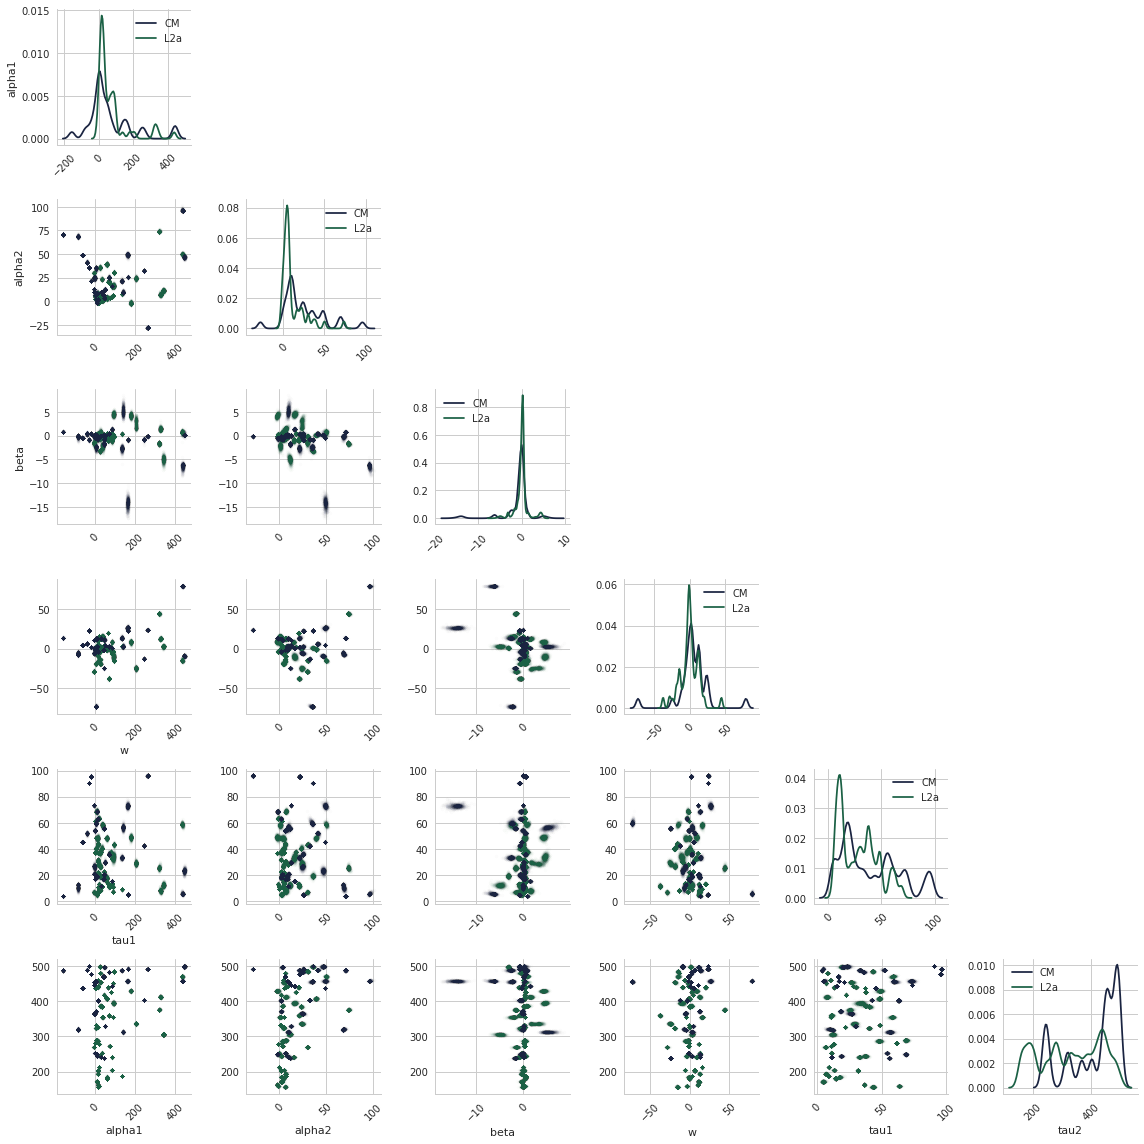

In [16]:
figure(figsize=(16,16))
for i in range(6):
    for j in range(6):
        if j > i: break; 
        subplot(6,6,6*i+j+1)
        if i == j:
            sns.distplot(cm_chain[:,i],hist=False,label="CM")
            sns.distplot(l2a_chain[:,j],hist=False,label="L2a")
        else:
            plot(cm_chain[:,j],cm_chain[:,i],'.',alpha=0.01)
            plot(l2a_chain[:,j],l2a_chain[:,i],'.',alpha=0.01)
        
        xticks(rotation=45)    
        sns.despine()
            
        if 6*i+j == 0: ylabel("alpha1")
        if 6*i+j == 6: ylabel("alpha2")
        if 6*i+j == 12: ylabel("beta")
        if 6*i+j == 18: xlabel("w")
        if 6*i+j == 24: xlabel("tau1")
        if 6*i+j == 30: xlabel("tau2"); xlabel("alpha1")
        if 6*i+j == 31: xlabel("alpha2")
        if 6*i+j == 32: xlabel("beta")
        if 6*i+j == 33: xlabel("w")
        if 6*i+j == 34: xlabel("tau1")
        if 6*i+j == 35: xlabel("tau2")
                        
tight_layout()

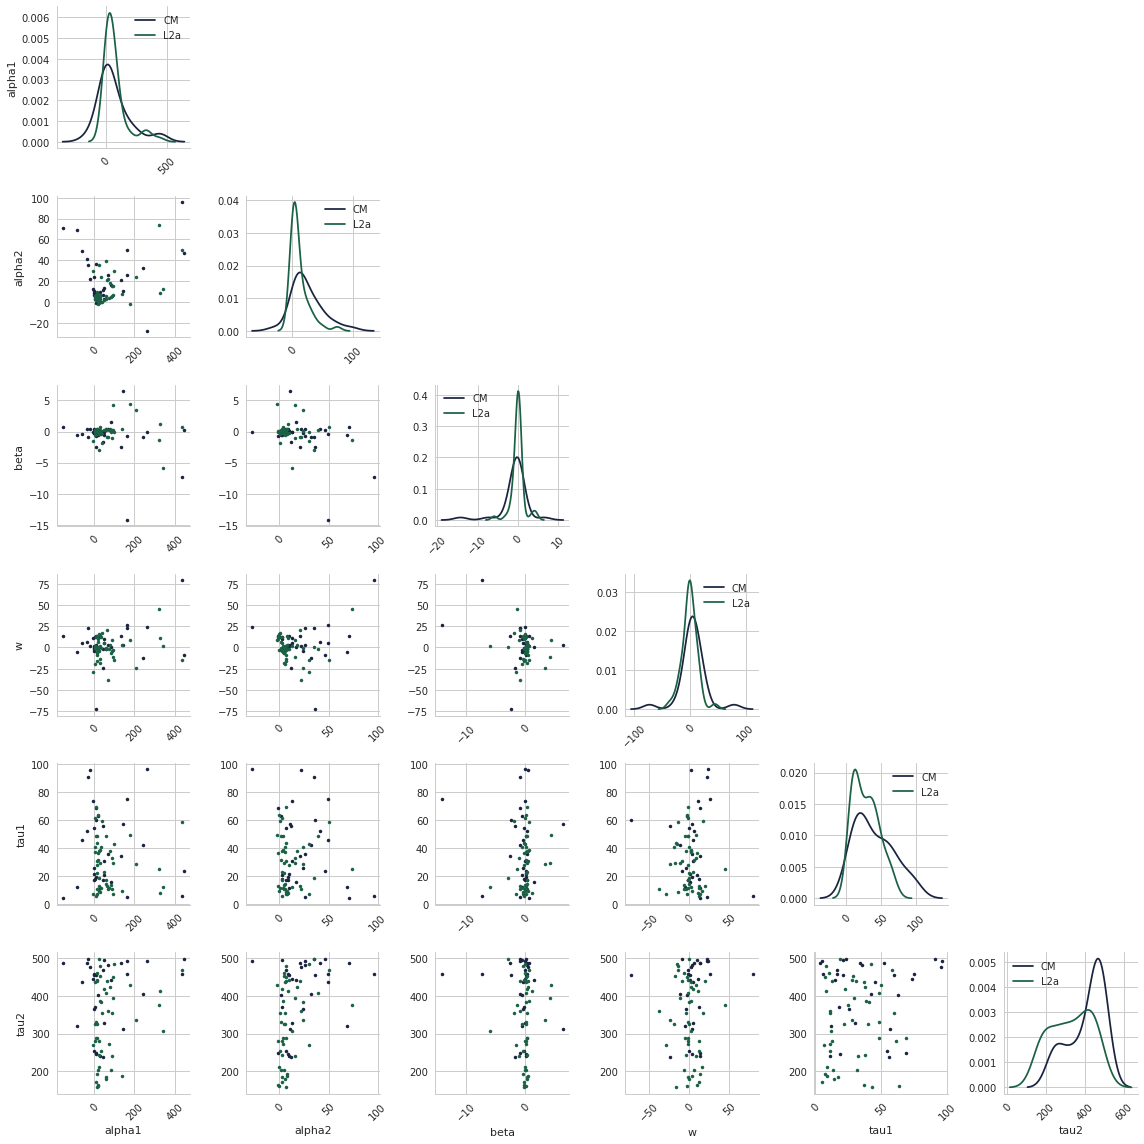

In [17]:
figure(figsize=(16,16))
for i in range(6):
    for j in range(6):
        if j > i: break
        subplot(6,6,6*i+j+1)
        if i == j:
            sns.distplot(cm_maxlik[:,i],hist=False,label="CM")
            sns.distplot(l2a_maxlik[:,j],hist=False,label="L2a")
        else:
            plot(cm_maxlik[:,j],cm_maxlik[:,i],'.',alpha=1)
            plot(l2a_maxlik[:,j],l2a_maxlik[:,i],'.',alpha=1)
        
        xticks(rotation=45)    
        sns.despine()
            
        if 6*i+j == 0: ylabel("alpha1");
        if 6*i+j == 6: ylabel("alpha2")
        if 6*i+j == 12: ylabel("beta")
        if 6*i+j == 18: ylabel("w")
        if 6*i+j == 24: ylabel("tau1")
        if 6*i+j == 30: ylabel("tau2"); xlabel("alpha1")
        if 6*i+j == 31: xlabel("alpha2")
        if 6*i+j == 32: xlabel("beta")
        if 6*i+j == 33: xlabel("w")
        if 6*i+j == 34: xlabel("tau1")
        if 6*i+j == 35: xlabel("tau2")


tight_layout()

In [110]:
data = pd.read_csv("./bulkdata.csv")
together = np.asarray(data[["GLM","DSTRF"]]).T
together_cm = np.asarray(data[data["region"]=="CM"][["GLM","DSTRF"]]).T
together_l2a = np.asarray(data[data["region"]=="L2a"][["GLM","DSTRF"]]).T

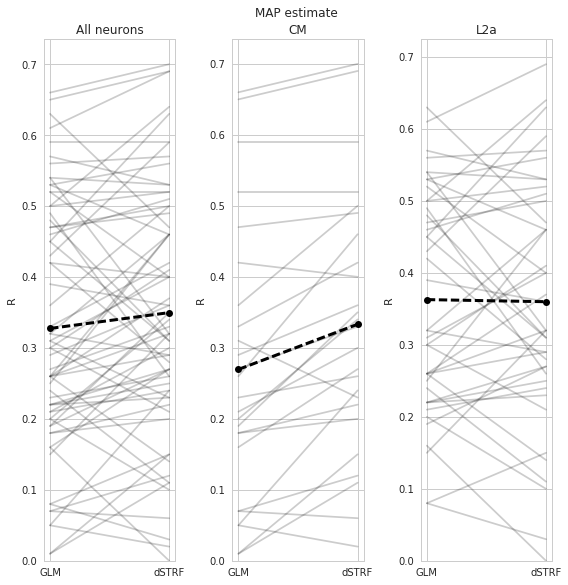

In [220]:
figure(figsize=(8,8))
subplot(131)
plot(together,"k",alpha=0.2);
plot(np.mean(together,axis=1),"ko--",linewidth=3)
xticks([0,1],["GLM","dSTRF"]);
ylim(0)
#yticks(np.arange(0,1.1,0.1));
ylabel("R")
title("All neurons")

subplot(132)
plot(together_cm,"k",alpha=0.2);
plot(np.mean(together_cm,axis=1),"ko--",linewidth=3)
xticks([0,1],["GLM","dSTRF"]);
ylim(0)
#yticks(np.arange(0,1.1,0.1));
ylabel("R")
title("CM")

subplot(133)
plot(together_l2a,"k",alpha=0.2);
plot(np.mean(together_l2a,axis=1),"ko--",linewidth=3)
xticks([0,1],["GLM","dSTRF"]);
ylim(0)
#yticks(np.arange(0,1.1,0.1));
ylabel("R")
title("L2a")
suptitle("MAP estimate",y=1.01,x=0.52)

tight_layout()
